# Machine Learning process

### Imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import itertools
from sklearn.model_selection import train_test_split

### Load data

In [9]:
##       TEST 1:
## Selecting a CSV for train and another CSV to test

# df_train = pd.read_csv('./filtered_data/smartphone_02-Feb-2022-20-22_cambio de línea agresivo izquierda_Data-Mv2MN6xv2W3Rv1Rmb_Z.csv')
# df_test = pd.read_csv('./filtered_data/smartphone_02-Feb-2022-20-19_cambio de línea agresivo izquierda_Data-Mv2L_EBJR_gDU3LpwVs.csv')


##       TEST 2:
## Joining all CSVs of a particular event

device = 'smartphone'
event = 'frenada repentina'
files_to_read = glob.glob('./filtered_data/{}*{}*.csv'.format(device, event))

df = pd.DataFrame()
for file in files_to_read:
    df = pd.concat([df, pd.read_csv(file)])
df = df.set_index('id')

##       TEST 2-1:
## Spliting the TEST 2 dataframe in train and test

# df_train, df_test = train_test_split(df, test_size=0.3, train_size=0.7, random_state=0, shuffle=False)
# print("Train data size: ", df_train.shape)
# print("Near crash event train data size: ", df_train["eventClass"][df_train["eventClass"] == 1].shape)
# print("No near crash event train data size: ", df_train["eventClass"][df_train["eventClass"] == 0].shape)

# print("\nTest data size: ", df_test.shape)
# print("Near crash event test data size: ", df_test["eventClass"][df_test["eventClass"] == 1].shape)
# print("No near crash event test data size: ", df_test["eventClass"][df_test["eventClass"] == 0].shape)

##      TEST 2-2:
## Don't split the TEST 2 dataframe!

print("All data size: ", df.shape)
print("Near crash event data size: ", df["eventClass"][df["eventClass"] == 1].shape)
print("No near crash event data size: ", df["eventClass"][df["eventClass"] == 0].shape)

# Show dataframe
df

All data size:  (3893, 17)
Near crash event data size:  (371,)
No near crash event data size:  (3522,)


,accX,accY,accZ,eventClass,idTrip,idVehicle,latitude,longitude,magX,magY,magZ,route,speed,timestamp,velAngX,velAngY,velAngZ
id,,,,,,,,,,,,,,,,,
32845,0.346099,0.070198,9.624315,0,7,Nissan March (Xiaomi Redmi Note 9S),0.834003,-77.650027,17.012911,-36.339381,58.393587,Frenada repentina,11.969349,2022-02-02 20:01:54.474000-05:00,0.003772,0.008679,0.004936
32846,0.332630,0.228663,9.626677,0,7,Nissan March (Xiaomi Redmi Note 9S),0.834003,-77.650027,17.007483,-36.351898,58.403046,Frenada repentina,11.969349,2022-02-02 20:01:54.523000-05:00,0.004849,0.008580,0.004002
32847,0.347030,0.102652,9.635826,0,7,Nissan March (Xiaomi Redmi Note 9S),0.834003,-77.650027,17.115962,-36.166384,58.259435,Frenada repentina,11.969349,2022-02-02 20:01:54.573000-05:00,0.002411,0.009508,0.001526
32848,0.339322,0.322767,9.615295,0,7,Nissan March (Xiaomi Redmi Note 9S),0.834003,-77.650027,17.133944,-36.124541,58.227670,Frenada repentina,11.969349,2022-02-02 20:01:54.623000-05:00,0.004636,0.009561,0.000243
32849,0.323775,0.208919,9.623269,0,7,Nissan March (Xiaomi Redmi Note 9S),0.834003,-77.650027,17.215184,-35.984128,58.118212,Frenada repentina,11.969349,2022-02-02 20:01:54.674000-05:00,0.003937,0.016739,-0.000274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,-0.147757,0.372108,9.587312,0,8,Nissan March (Xiaomi Redmi Note 9S),0.834021,-77.649971,5.249560,-42.765878,59.910675,Frenada repentina,4.455676,2022-01-23 18:51:44.161000-05:00,-0.007760,0.004642,-0.000040
6044,-0.146176,0.795273,9.642961,0,8,Nissan March (Xiaomi Redmi Note 9S),0.834021,-77.649971,4.842095,-42.631307,60.340371,Frenada repentina,4.455676,2022-01-23 18:51:44.212000-05:00,0.008748,0.006942,-0.000812
6045,-0.210525,0.939888,9.710958,0,8,Nissan March (Xiaomi Redmi Note 9S),0.834021,-77.649971,4.692880,-43.168732,60.724920,Frenada repentina,4.455676,2022-01-23 18:51:44.261000-05:00,0.023007,0.004906,0.000350


### Select the interest variables

In [10]:
# Features = ["speed","accX","accY","magX","magY","magZ", "velAngX","velAngY","velAngZ","timestamp","eventClass"]
# Always put "eventClass" at the end:

event_features = ["speed","accY"]
event_features_label = [*event_features,  "eventClass"]
dataset = df[event_features_label].to_numpy()
print("All data shape for the selected features: ",dataset.shape)

##    TEST 1 or 2-1
## Run the following code for the mentioned TEST
## Don't run in the TEST 2-2

# dataset_train = df_train[event_features_label].to_numpy()
# print("Shape of training data for the selected features: ", dataset_train.shape)

# dataset_test = df_test[event_features_label].to_numpy()
# print("Shape of testing data for the selected features: ", dataset_test.shape)

All data shape for the selected features:  (3893, 3)


### Make a sliding window

The sliding window have this shape:

$ rows = m - ws + 1 \\  columns = ws \\ pages = d$

![](https://es.mathworks.com/help/matlab/math/nddemo_02_es.gif)

Where:
- ***m***:  Is the dataset rows number
- ***ws***: Is the window size
- ***d***:  Is the number of feature of the data


#### Naive alternative
Sliding window without frames

In [11]:
def sliding_windows(dataset, window_size, event_features="X"):
      
      #     In 2-dimensional dataset:
      # Axis 0 -> Goes through the rows
      # Axis 1 -> Goes through the Cols
      sld_window = np.lib.stride_tricks.sliding_window_view(dataset, window_size, axis=0) #[::1, :] Add this for define window step
      print("\nSliding windows shape: ",sld_window.shape)

      # Spliting the dataset (features, label)
      separator = dataset.shape[1] - 1 # Split the last page corresponding to the eventClass
      features_data = sld_window[:, 0:separator, :]
      label_data = sld_window[:, separator, :]

      # Processing the sliding window
      # Get the mean, median, std, max and min value
      mean = features_data.mean(axis=2)
      median = np.median(features_data, axis=2)
      std = features_data.std(axis=2)
      max_val = features_data.max(axis=2)
      min_val = features_data.min(axis=2)
      # Get tendency
      divider = np.array([mean[0], *mean[:-1]])
      tendency = mean/np.where(divider == 0, 1, divider)
      # Get the label via the mode
      label = st.mode(label_data, axis=1)[0]

      # Check processed sliding window
      print("Processed sliding window shape: " +
            "mean={}, median={}, std={}, max_val={}, min_val={}, tendency={}, label={}"
            .format(mean.shape, median.shape, std.shape, max_val.shape, min_val.shape, tendency.shape, label.shape))

      # Concatenate processed sliding window
      sld_window_features = np.concatenate((mean, median, std, max_val, min_val, tendency), axis=1)
      # Reshape label for sklearn standard
      label = label.reshape(label.shape[0])

      # Make the features names
      e_n = len(event_features) # Events number
      measurements_names = [["mean"]*e_n, ["median"]*e_n, ["std"]*e_n, ["max_val"]*e_n, ["min_val"]*e_n, ["tendency"]*e_n]
      measurements_names = list(itertools.chain(*measurements_names))
      events_names = event_features*(len(measurements_names)//e_n)
      sld_window_features_names = list(map('_'.join, zip(measurements_names, events_names)))

      return (sld_window_features, label, sld_window_features_names)


In [15]:
window_size = 20

##    TEST 1, 2-1

# X_train, y_train = sliding_windows(variables_train, window_size)
# X_test, y_test = sliding_windows(variables_test, window_size)

##    TEST 2-2

X, y, features_names = sliding_windows(dataset, window_size, event_features)


Sliding windows shape:  (3874, 3, 20)
Processed sliding window shape: mean=(3874, 2), median=(3874, 2), std=(3874, 2), max_val=(3874, 2), min_val=(3874, 2), tendency=(3874, 2), label=(3874, 1)


#### Input features

In [16]:
##    TEST 1 or 2-1

# print("Train features shape:", X_train.shape)
# #print(X_train[0:5])
# print("Near crash event train data size: ", np.where(y_train == 1)[0].shape)
# print("No near crash event train data size: ", np.where(y_train == 0)[0].shape)

# print("\n")
# print("Test features shape:", X_test.shape)
# #print(X_test[0:5])
# print("Near crash event test data size: ", np.where(y_test == 1)[0].shape)
# print("No near crash event test data size: ", np.where(y_test == 0)[0].shape)

##    TEST 2-2

print("Features shape:", X.shape)
print("\nNear crash event train data size: ", np.where(y == 1)[0].shape)
print("No near crash event train data size: ", np.where(y == 0)[0].shape)
print("Sample of features: \n")
pd.DataFrame(X[0:2], columns=features_names).head()


Features shape: (3874, 12)

Near crash event train data size:  (360,)
No near crash event train data size:  (3514,)
Sample of features: 



,mean_speed,mean_accY,median_speed,median_accY,std_speed,std_accY,max_val_speed,max_val_accY,min_val_speed,min_val_accY,tendency_speed,tendency_accY
0,11.969349,-0.058163,11.969349,-0.154606,0.0,0.215023,11.969349,0.322767,11.969349,-0.358329,1.0,1.000000
1,11.969349,-0.052625,11.969349,-0.154606,0.0,0.219634,11.969349,0.322767,11.969349,-0.358329,1.0,0.904795


## Machine Learning 

Make a Machine Learning algorithms with this librarys and this split of data

In [17]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=15, shuffle=True)

### Support Vector Machines

In [36]:
clf_svm = svm.SVC(C=2, gamma=0.5, kernel='rbf', random_state=0)
clf_svm.fit(X_train, y_train)

SVC(C=2, gamma=0.5, random_state=0)

### Decision Trees

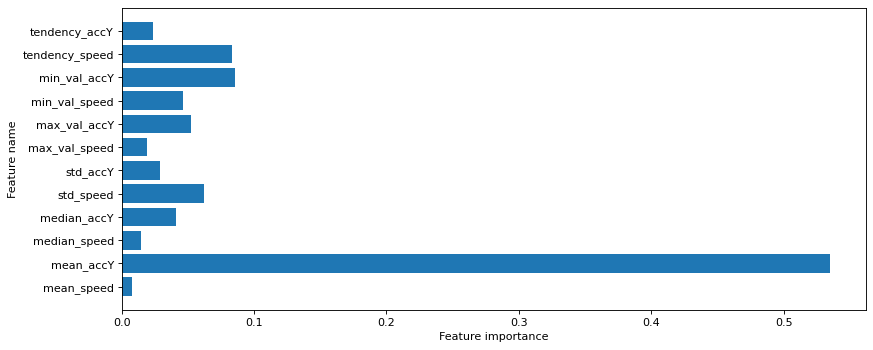

In [19]:
clf_dt = tree.DecisionTreeClassifier(criterion = "gini", max_depth=None, max_leaf_nodes=None)
clf_dt.fit(X_train, y_train)

# Check more significants variables
def plot_feature_importances(clf, features_names):
    c_features = len(features_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features_names)

plt.figure(figsize=(12,5), dpi=80)
plot_feature_importances(clf_dt, features_names)
plt.show()

Decision tree representation

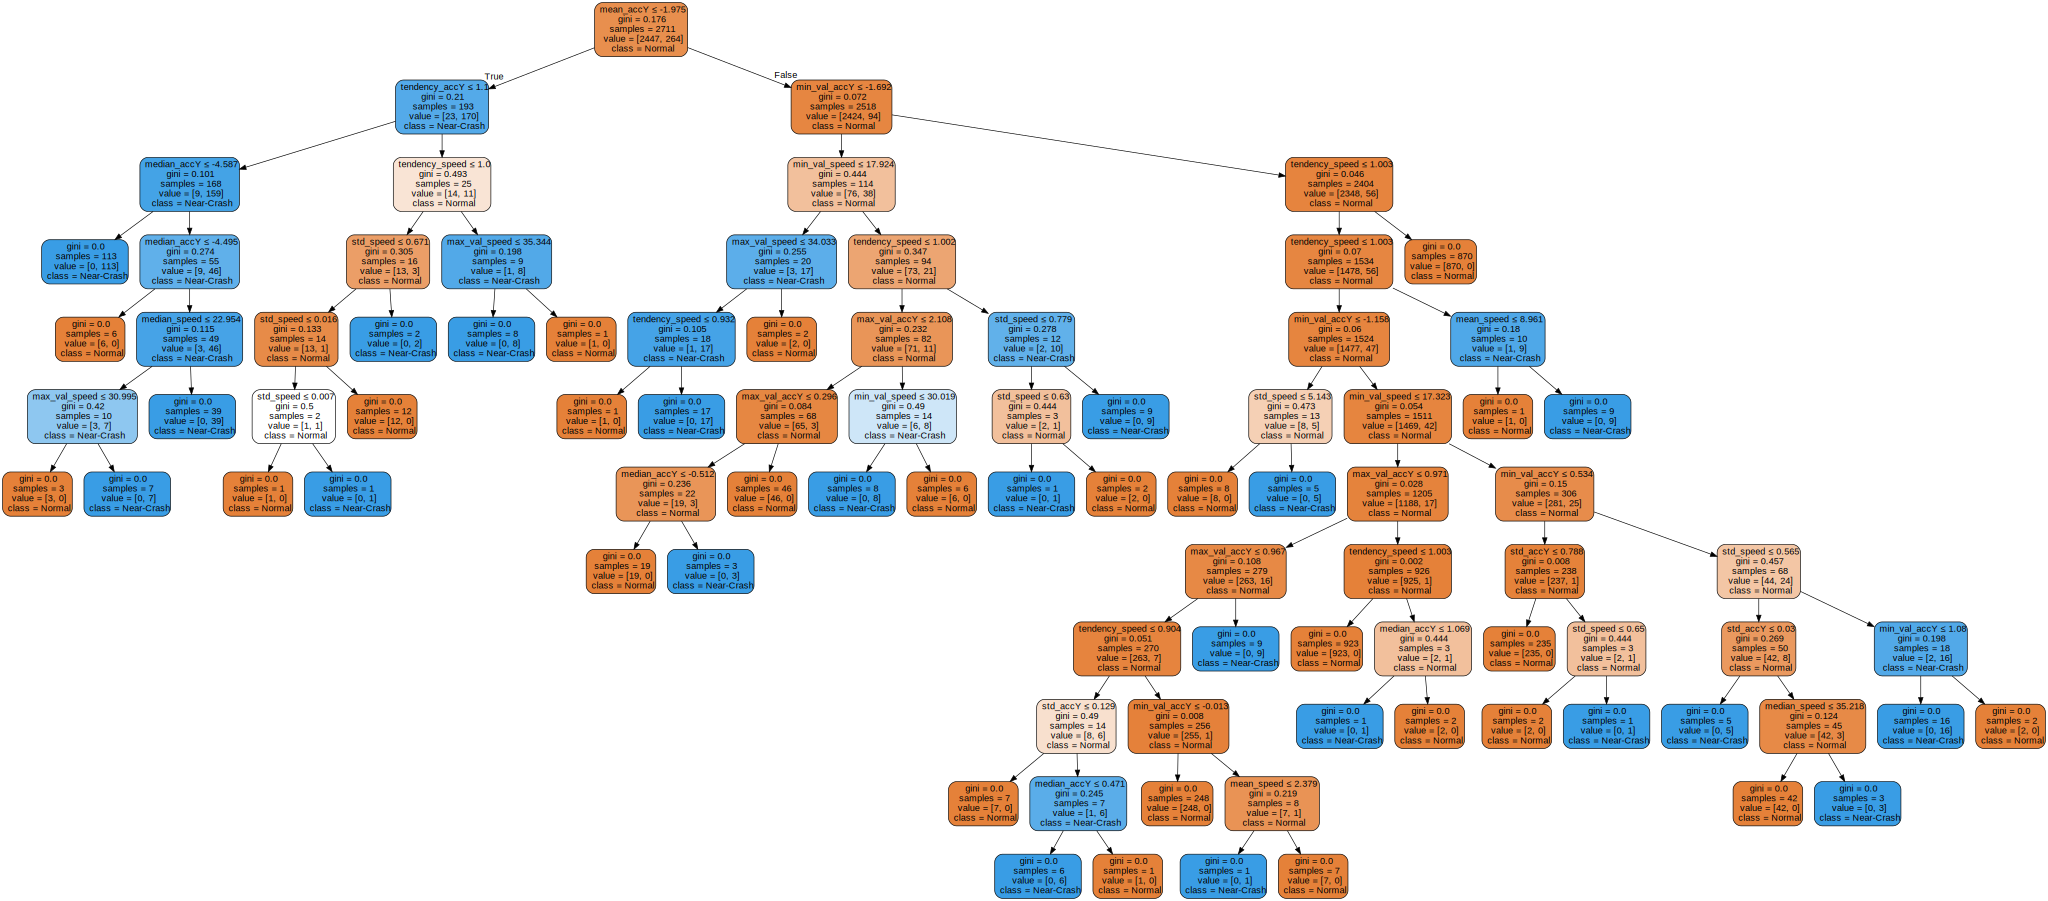

In [20]:
import graphviz
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                                feature_names=features_names,
                                class_names=["Normal", "Near-Crash"],
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data)
graph

### Random forest

In [21]:
clf_rf = RandomForestClassifier(n_estimators=5)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

### Test ML algorithm

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
"""
Accuracy = TP + TN / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
F1 = 2 * Precision * Recall / (Precision + Recall)
"""

for clf in (clf_svm, clf_dt, clf_rf):
    y_predict = clf.predict(X_test)
    print("\nClassifier Name: ",clf.__class__.__name__)
    #y_score = clf.decision_function(X_test)
    #y_predict_proba = clf.predict_proba(X_test)

    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predict)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_predict)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_predict)))
    print('F1: {:.2f}'.format(f1_score(y_test, y_predict)))
    print("Count total data predicted: Near Crash = {}, Normal = {}".format(Counter(y_predict)[1], Counter(y_predict)[0]))


Classifier Name:  SVC
Accuracy: 0.97
Precision: 0.96
Recall: 0.68
F1: 0.79
Count total data predicted: Near Crash = 68, Normal = 1095

Classifier Name:  DecisionTreeClassifier
Accuracy: 0.99
Precision: 0.95
Recall: 0.88
F1: 0.91
Count total data predicted: Near Crash = 88, Normal = 1075

Classifier Name:  RandomForestClassifier
Accuracy: 0.99
Precision: 0.98
Recall: 0.92
F1: 0.95
Count total data predicted: Near Crash = 90, Normal = 1073


#### Confusion matrix


Classifier Name:  SVC


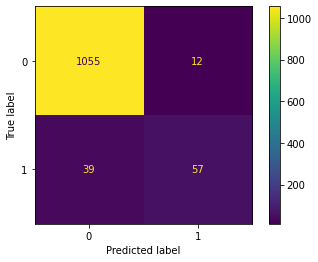


Classifier Name:  DecisionTreeClassifier


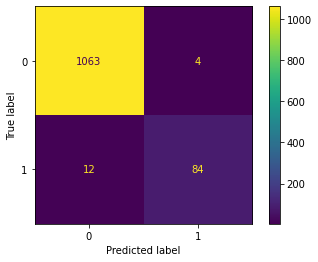


Classifier Name:  RandomForestClassifier


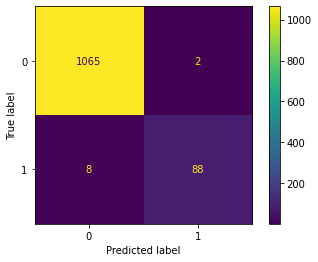

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for clf in (clf_svm, clf_dt, clf_rf):
    print("\nClassifier Name: ",clf.__class__.__name__)
    y_predict = clf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_predict)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot()
    plt.show()

#### Roc curves and Area Under Curve (AUC)

In [30]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(clf, X_test, y_test):
    y_score = clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    accuracy = clf.score(X_test, y_test)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='Algorithm (acc = {:0.2f}, area = {:0.2f})'.format(accuracy, roc_auc))

    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
    plt.legend(loc="lower right", fontsize=11)
    plt.title('ROC curve: ', fontsize=16)
    plt.show()

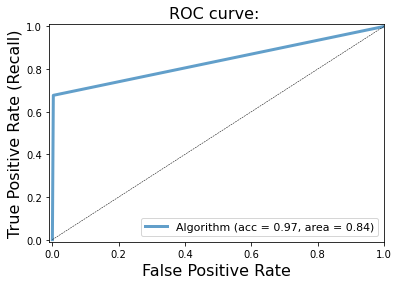

In [38]:
plot_roc_curve(clf_svm, X_test, y_test)

# Sliding window with frames

In [150]:
# Tendency
'''
def trend(arr):
    """This function calculates the trend with the unique loopback option for this type of calculation

    This tendency is not make for frame form, for this reason the equation is this: register(i)/last_register
    where "i" is the position of a register

    Note: I calculate the first tendency how last_register/last_register = 1, 
    this data appear in all first values of all rows in the slide window
    """
    t = [arr[-i]/arr[-1] for i in range(1, len(arr)+1)]
    #mean[::-1]/mean[-1]
    #for i in range(1,len(array)+1):
    #    t.append(array[-i]/array[-1])
    return np.array(t)

variables_trend = np.apply_along_axis(trend, axis=2, arr=measured_variables)
variables_trend = variables_trend.reshape(variables_trend.shape[0], variables_trend.shape[1]*ws)   # Son 20 para la speed y 20 para la accY
print("\nSample of sliding window process for tendency")
print("Tendency slide window shape: ", variables_trend.shape)
print("Tendency:\n {}".format(variables_trend[0:2,:]))
'''

'\ndef trend(arr):\n    """This function calculates the trend with the unique loopback option for this type of calculation\n\n    This tendency is not make for frame form, for this reason the equation is this: register(i)/last_register\n    where "i" is the position of a register\n\n    Note: I calculate the first tendency how last_register/last_register = 1, \n    this data appear in all first values of all rows in the slide window\n    """\n    t = [arr[-i]/arr[-1] for i in range(1, len(arr)+1)]\n    #mean[::-1]/mean[-1]\n    #for i in range(1,len(array)+1):\n    #    t.append(array[-i]/array[-1])\n    return np.array(t)\n\nvariables_trend = np.apply_along_axis(trend, axis=2, arr=measured_variables)\nvariables_trend = variables_trend.reshape(variables_trend.shape[0], variables_trend.shape[1]*ws)   # Son 20 para la speed y 20 para la accY\nprint("\nSample of sliding window process for tendency")\nprint("Tendency slide window shape: ", variables_trend.shape)\nprint("Tendency:\n {}".for

In [151]:
# tendency
'''
def means_loopback(array):
    """This functions calculate the means with loop back option
    """
    means = []
    for i in range(1,len(array)+1):
        means.append(array[-i:].mean())
    return np.array(means)

print("data to get loop back mean: \n", measured_variables[0:2,:,:])
# mean loopback test
mean_lb = np.apply_along_axis(means_loopback, 2, measured_variables[0:2,:,:])
print("Mean loopback: \n",mean_lb)
'''

'\ndef means_loopback(array):\n    """This functions calculate the means with loop back option\n    """\n    means = []\n    for i in range(1,len(array)+1):\n        means.append(array[-i:].mean())\n    return np.array(means)\n\nprint("data to get loop back mean: \n", measured_variables[0:2,:,:])\n# mean loopback test\nmean_lb = np.apply_along_axis(means_loopback, 2, measured_variables[0:2,:,:])\nprint("Mean loopback: \n",mean_lb)\n'